**建模分析**

采用KMeans聚类分析的方法

生成两个数据集，对两个数据集进行分析

一个：'Zcluster','ZCT','ZRC'

一个：'Zcluster','ZDAC','ZFS'


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
csvFile='./out'+os.sep+'data_zscore.csv'
data = pd.read_csv(csvFile,encoding='utf-8')
# 测试 输出数据的基本信息
print(data.head())
data00=data

               name   LS  Zcluster       ZCT       ZRC      ZDAC      ZTOE  \
0     吉林省昌农实业集团有限公司  张笑恺 -0.815702 -2.926139  0.648728 -1.264098 -0.437196   
1   吉林省华咨工程技术集团有限公司   刘尚 -0.815702 -0.333936  0.190141 -1.264098 -0.018151   
2     吉林省英辰科技股份有限公司   吴琼  1.225476 -1.653762  0.236000 -0.866729  0.400894   
3     吉林省寰旗科技股份有限公司  刘田影  1.225476 -1.240640  0.190141 -0.866729  0.400894   
4  长春融成智能设备制造股份有限公司  霍箭东  1.225476 -3.776625  0.930760 -0.469360  0.400894   

        ZFS      ZIBC  
0 -0.017479 -1.350068  
1 -0.017479 -1.350068  
2 -0.017479 -0.724731  
3 -0.017479 -0.099394  
4  2.425033 -1.350068  


生成第一个数据集

'Zcluster','ZCT','ZRC'


>>>[Success]KMeans聚类分析模型创建成功.

>>>已导入样本数据集，开始启动KMeans模型进行训练......

>>>[Success]KMeans模型训练完毕.

>>>查看样本对应的类别个数：
2    1395
1     987
0     273
dtype: int64

>>>查看样本类别的聚类标准中心值：
          0         1         2
0 -0.262416 -2.267026  0.738298
1  1.225476  0.454383 -0.064331
2 -0.815702  0.122166 -0.098968

>>>Kmeans聚类统计分析表1：
   聚类个数  Zcluster       ZCT       ZRC
2  1395 -0.815702  0.122166 -0.098968
1   987  1.225476  0.454383 -0.064331
0   273 -0.262416 -2.267026  0.738298

 数据文件存入成功

>>>KMeans分类明细统计表2：
      Zcluster       ZCT       ZRC  类别
0    -0.815702 -2.926139  0.648728   0
1    -0.815702 -0.333936  0.190141   2
2     1.225476 -1.653762  0.236000   0
3     1.225476 -1.240640  0.190141   1
4     1.225476 -3.776625  0.930760   0
...        ...       ...       ...  ..
2650  1.225476  1.061192 -0.256982   1
2651  1.225476  1.063255 -0.256982   1
2652 -0.815702  0.370075 -0.256982   2
2653 -0.815702  0.792481 -0.245517   2
2654  1.225476  1.253054 -0.245517   1

[2655 rows x 4 columns]

 

D:\Anaconda\2023.7.0\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


>>>图像存储成功！！


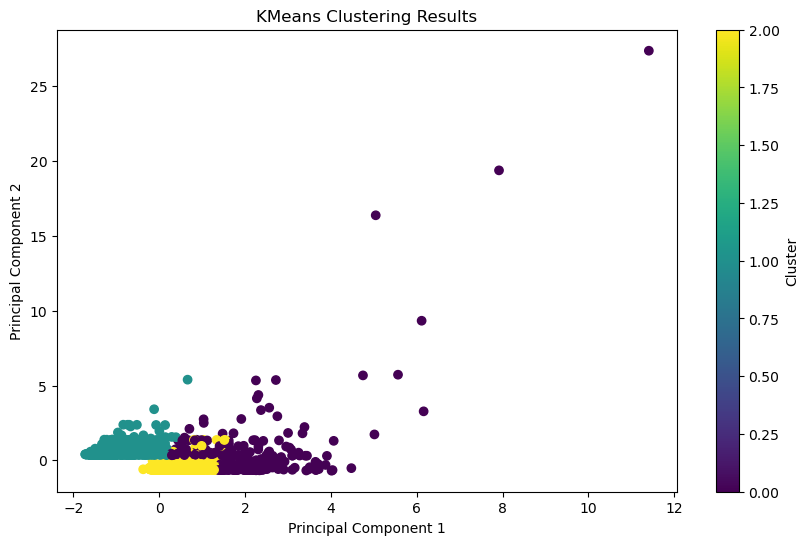

In [3]:
# 设置聚类分析算法的分类个数
data = data00[['Zcluster','ZCT','ZRC']]
k=3
# 创建KMeans聚类模型对象实例
# n_clusters：分类个数  n_jobs：算力CPU的计算能力标准 1-4  n_init参数表示了尝试不同初始中心点的次数。
kmodel = KMeans(n_clusters=k,n_init='auto')
print('\n>>>[Success]KMeans聚类分析模型创建成功.')
# 模型的训练 大多数模型都会采用fit来训练模型
print('\n>>>已导入样本数据集，开始启动KMeans模型进行训练......')
kmodel.fit(data)
print('\n>>>[Success]KMeans模型训练完毕.')

 # 查看样本对应的类别个数
print('\n>>>查看样本对应的类别个数：')
r1 = pd.Series(kmodel.labels_).value_counts()
print(r1)

 # 查看聚类中心值
print('\n>>>查看样本类别的聚类标准中心值：')
r2 = pd.DataFrame(kmodel.cluster_centers_)
print(r2)

data_cluster = pd.concat([r1,r2],axis = 1) # 按行链接
# 重新命名全新的数据集列名称
data_cluster.columns = ['聚类个数','Zcluster','ZCT','ZRC']
# 'ZRC','ZDAC','ZNOI','ZTOE','ZFS','ZIS','ZIBC'  对应  '注册资本','所属区县','参保人数','企业(机构)类型','企业规模','国标行业门类','国标行业大类'

# 测试
print('\n>>>Kmeans聚类统计分析表1：')
print(data_cluster)

# 存入文件
csvFile = os.getcwd() + os.sep + 'out' + os.sep + 'KMeans_clusters00.csv'
data_cluster.to_csv(csvFile,encoding='utf_8_sig', index = False)
print('\n 数据文件存入成功')

# 将原来无标签的数据转换成有标签的数据，拼接
data_details = pd.concat([data, pd.Series(kmodel.labels_,index = data.index)], axis = 1)
# 重新命名全新的数据集列名称
data_details.columns = ['Zcluster','ZCT','ZRC','类别']

# 测试
print('\n>>>KMeans分类明细统计表2：')
print(data_details)


#存入文件
csvFile = os.getcwd() + os.sep + 'out' + os.sep + 'KMeans_clusters00_details_data.csv'
data_details.to_csv(csvFile,encoding='utf_8_sig', index = False)
print('\n 数据文件存入成功')

# 可视化聚类结果
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmodel.labels_, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
# 存储图像
plt.savefig(os.getcwd() + os.sep + 'image' + os.sep + 'KMeans_clusters_visualization00.png')
print(">>>图像存储成功！！")
# 展示可视化结果
plt.show()

生成第二个数据集

'Zcluster','ZDAC','ZFS'


>>>[Success]KMeans聚类分析模型创建成功.

>>>已导入样本数据集，开始启动KMeans模型进行训练......

>>>[Success]KMeans模型训练完毕.

>>>查看样本对应的类别个数：
1    986
3    814
2    644
0    211
dtype: int64

>>>查看样本类别的聚类标准中心值：
          0         1         2
0 -0.235273 -0.066341 -2.459992
1  1.225476 -0.027256  0.193082
2 -0.768159  0.990540  0.213877
3 -0.815702 -0.733459  0.234574

>>>Kmeans聚类统计分析表1：
   聚类个数  Zcluster      ZDAC       ZFS
1   986  1.225476 -0.027256  0.193082
3   814 -0.815702 -0.733459  0.234574
2   644 -0.768159  0.990540  0.213877
0   211 -0.235273 -0.066341 -2.459992

 数据文件存入成功

>>>KMeans分类明细统计表2：
      Zcluster      ZDAC       ZFS  类别
0    -0.815702 -1.264098 -0.017479   3
1    -0.815702 -1.264098 -0.017479   3
2     1.225476 -0.866729 -0.017479   1
3     1.225476 -0.866729 -0.017479   1
4     1.225476 -0.469360  2.425033   1
...        ...       ...       ...  ..
2650  1.225476  0.325379 -0.017479   1
2651  1.225476 -0.866729 -0.017479   1
2652 -0.815702  0.325379 -0.017479   2
2653 -0.815702 -0.469360 -0.0

D:\Anaconda\2023.7.0\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


>>>图像存储成功！！


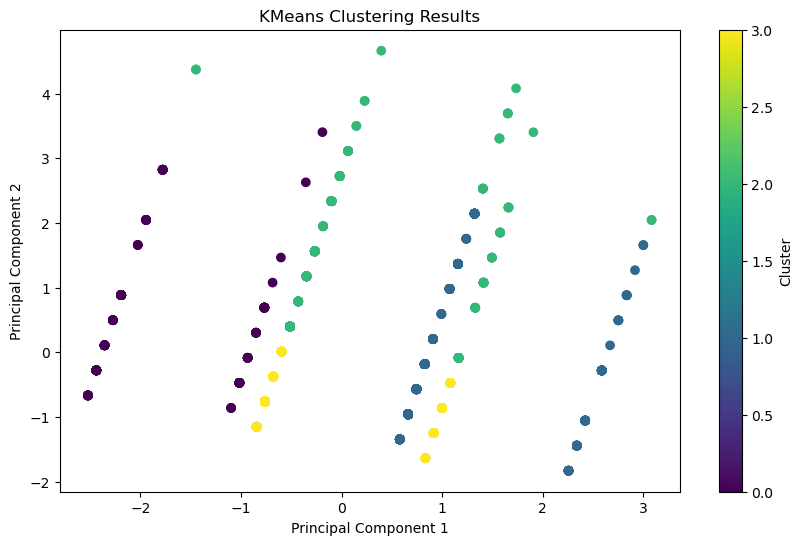

In [18]:
# 设置聚类分析算法的分类个数
data = data00[['Zcluster','ZDAC','ZFS']]
k=4
# 创建KMeans聚类模型对象实例
# n_clusters：分类个数  n_jobs：算力CPU的计算能力标准 1-4  n_init参数表示了尝试不同初始中心点的次数。
kmodel = KMeans(n_clusters=k,n_init='auto')
print('\n>>>[Success]KMeans聚类分析模型创建成功.')
# 模型的训练 大多数模型都会采用fit来训练模型
print('\n>>>已导入样本数据集，开始启动KMeans模型进行训练......')
kmodel.fit(data)
print('\n>>>[Success]KMeans模型训练完毕.')

 # 查看样本对应的类别个数
print('\n>>>查看样本对应的类别个数：')
r1 = pd.Series(kmodel.labels_).value_counts()
print(r1)

 # 查看聚类中心值
print('\n>>>查看样本类别的聚类标准中心值：')
r2 = pd.DataFrame(kmodel.cluster_centers_)
print(r2)

data_cluster = pd.concat([r1,r2],axis = 1) # 按行链接
# 重新命名全新的数据集列名称
data_cluster.columns = ['聚类个数','Zcluster','ZDAC','ZFS']
# 'ZRC','ZDAC','ZNOI','ZTOE','ZFS','ZIS','ZIBC'  对应  '注册资本','所属区县','参保人数','企业(机构)类型','企业规模','国标行业门类','国标行业大类'

# 测试
print('\n>>>Kmeans聚类统计分析表1：')
print(data_cluster)

# 存入文件
csvFile = os.getcwd() + os.sep + 'out' + os.sep + 'KMeans_clusters01.csv'
data_cluster.to_csv(csvFile,encoding='utf_8_sig', index = False)
print('\n 数据文件存入成功')

# 将原来无标签的数据转换成有标签的数据，拼接
data_details = pd.concat([data, pd.Series(kmodel.labels_,index = data.index)], axis = 1)
# 重新命名全新的数据集列名称
data_details.columns = ['Zcluster','ZDAC','ZFS','类别']

# 测试
print('\n>>>KMeans分类明细统计表2：')
print(data_details)


#存入文件
csvFile = os.getcwd() + os.sep + 'out' + os.sep + 'KMeans_clusters01_details_data.csv'
data_details.to_csv(csvFile,encoding='utf_8_sig', index = False)
print('\n 数据文件存入成功')

# 可视化聚类结果
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmodel.labels_, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
# 存储图像
plt.savefig(os.getcwd() + os.sep + 'image' + os.sep + 'KMeans_clusters_visualization01.png')
print(">>>图像存储成功！！")
# 展示可视化结果
plt.show()